In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# import CSV file

credit_card_df = pd.read_csv(r"C:\Users\Asus\Downloads\creditcard.csv\creditcard.csv")

 The dataset containing credit-related information lacks explicit column names, making it challenging to identify the exact attributes. However, we can speculate potential columns such as gender, credit limit, card number, and CVC code based on typical credit-related datasets. Without specific column names, understanding and interpreting the data may be limited, emphasizing the importance of obtaining proper documentation or metadata to enhance data comprehension and analysis.






In [4]:
# Checking How many rows and columns 

credit_card_df.shape

(284807, 31)

In [5]:
# Checking for null values

credit_card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Checking first five rows

credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Checking last five rows

credit_card_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
# Basic information of data

credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Distrubution of legit transaction and fraud transaction

credit_card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# Seprating the data

valid= credit_card_df[credit_card_df.Class ==0]
fraud= credit_card_df[credit_card_df.Class ==1]

In [11]:
print(valid.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
# Statistical measures of the data
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# Compare the values

credit_card_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
valid_sample = valid.sample(n=492)

In [16]:
# concinate two dataframe

new_df = pd.concat([valid_sample,fraud],axis=0)

In [17]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
115211,73787.0,-0.824102,1.069269,0.418980,-0.270841,0.832357,0.215263,0.448082,0.305164,-0.292763,...,-0.330369,-0.775519,0.035289,-1.375045,-0.005370,0.155916,-0.133457,-0.228607,12.67,0
164077,116429.0,-0.813724,0.698358,-0.323824,-0.981480,1.433051,-0.855953,0.747091,-0.000969,-0.060064,...,-0.199694,-0.542083,0.094971,0.594466,-1.022445,-0.101597,0.143362,0.356286,5.37,0
30828,36096.0,0.675662,-0.007997,2.049106,0.294774,-0.222951,-0.221284,0.770456,-1.591113,2.311984,...,0.001156,1.215050,0.081041,0.408262,-1.369751,0.200184,-1.697019,-1.648495,14.27,0
274339,165964.0,-0.104912,0.890888,0.588919,-0.365967,0.633948,-0.767231,1.070473,-0.235475,-0.527720,...,-0.137961,-0.332533,0.121801,1.176432,-0.780710,0.121415,0.129051,0.200080,10.78,0
206778,136366.0,-0.180755,0.358483,0.573460,-0.555092,1.017960,-1.159174,1.056286,-0.416998,-0.032889,...,-0.175109,-0.366632,0.124562,-0.090025,-1.001541,0.047541,-0.024454,-0.006578,8.18,0


In [18]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [19]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95935.268293,-0.065028,0.016636,-0.017857,0.008762,0.018857,-0.074050,-0.020777,-0.089824,-0.066535,...,0.022305,0.081119,0.020372,-0.036949,-0.011289,-0.026138,-0.000981,0.006101,-0.002063,96.520325
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
# Separate features (X) and target variable (y)

X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [21]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
115211   73787.0 -0.824102  1.069269  0.418980 -0.270841  0.832357  0.215263   
164077  116429.0 -0.813724  0.698358 -0.323824 -0.981480  1.433051 -0.855953   
30828    36096.0  0.675662 -0.007997  2.049106  0.294774 -0.222951 -0.221284   
274339  165964.0 -0.104912  0.890888  0.588919 -0.365967  0.633948 -0.767231   
206778  136366.0 -0.180755  0.358483  0.573460 -0.555092  1.017960 -1.159174   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [22]:
print(Y)

115211    0
164077    0
30828     0
274339    0
206778    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [23]:
# Split the dataset into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [25]:
# Preprocess and normalize the data using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Exploratory Data Analysis

## Distribution of Classes (Fraud vs. Valid)

#### Bar plot showing the count of each class.

Text(0, 0.5, 'Number of Transactions')

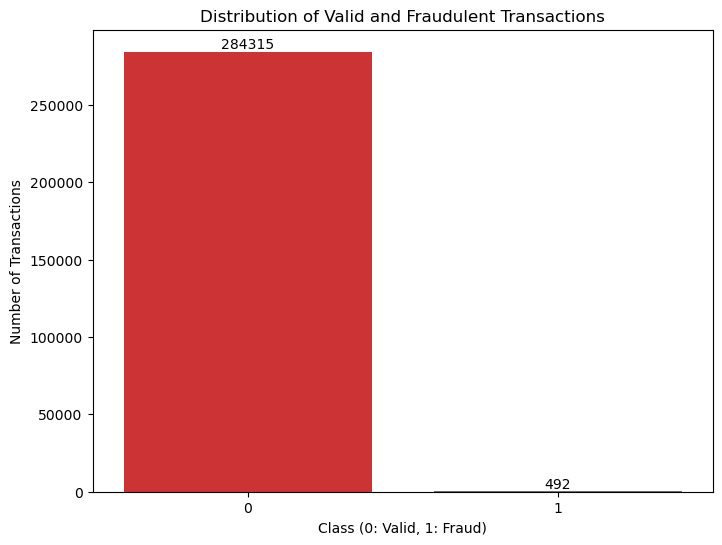

In [26]:
# Count the occurrences of each class
class_counts = credit_card_df['Class'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set1')

for i, value in enumerate(class_counts.values):
    plt.text(i, value + 20, str(value), ha='center', va='bottom')

# Adding labels and title
plt.title('Distribution of Valid and Fraudulent Transactions')
plt.xlabel('Class (0: Valid, 1: Fraud)')
plt.ylabel('Number of Transactions')


Class Distribution:

The distribution of classes indicates a significant class imbalance, with a considerably higher number of valid transactions compared to fraudulent ones.

## Transaction Amount Distribution by Class

#### Boxplot and Violinplot to visualize the distribution of transaction amounts for each class.

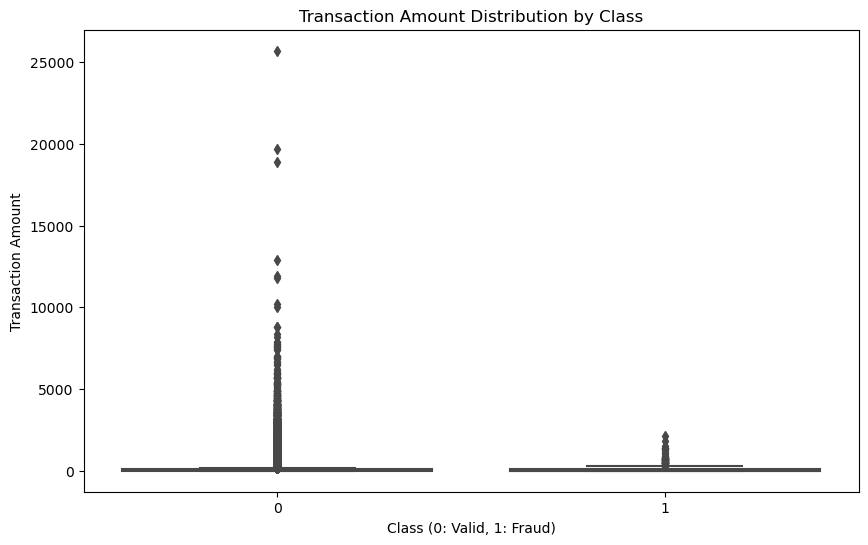

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card_df, palette='Set1')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Class (0: Valid, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


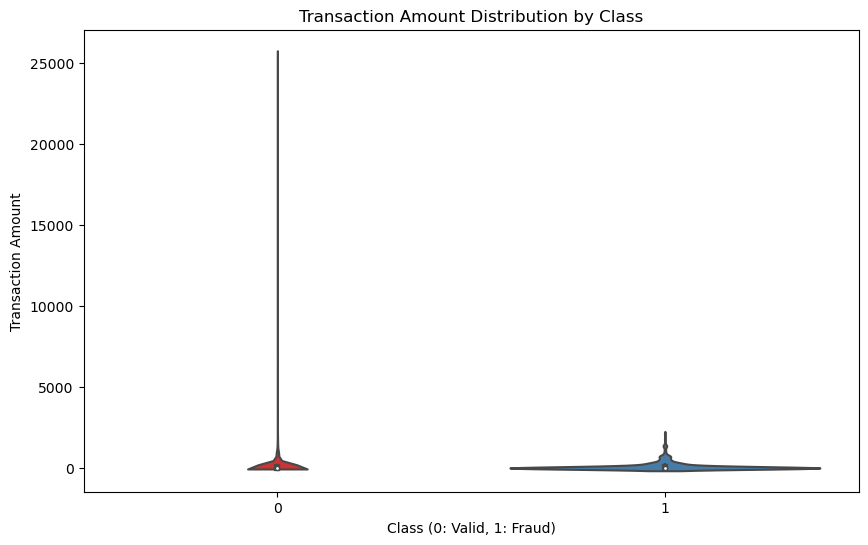

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Amount', data=credit_card_df, palette='Set1')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Class (0: Valid, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


These plots show the spread of transaction amounts for fraud and valid transactions. You can observe whether fraudulent transactions tend to have higher or lower amounts compared to valid transactions.

## Correlation Heatmap

#### Heatmap to visualize the correlation between numerical features.

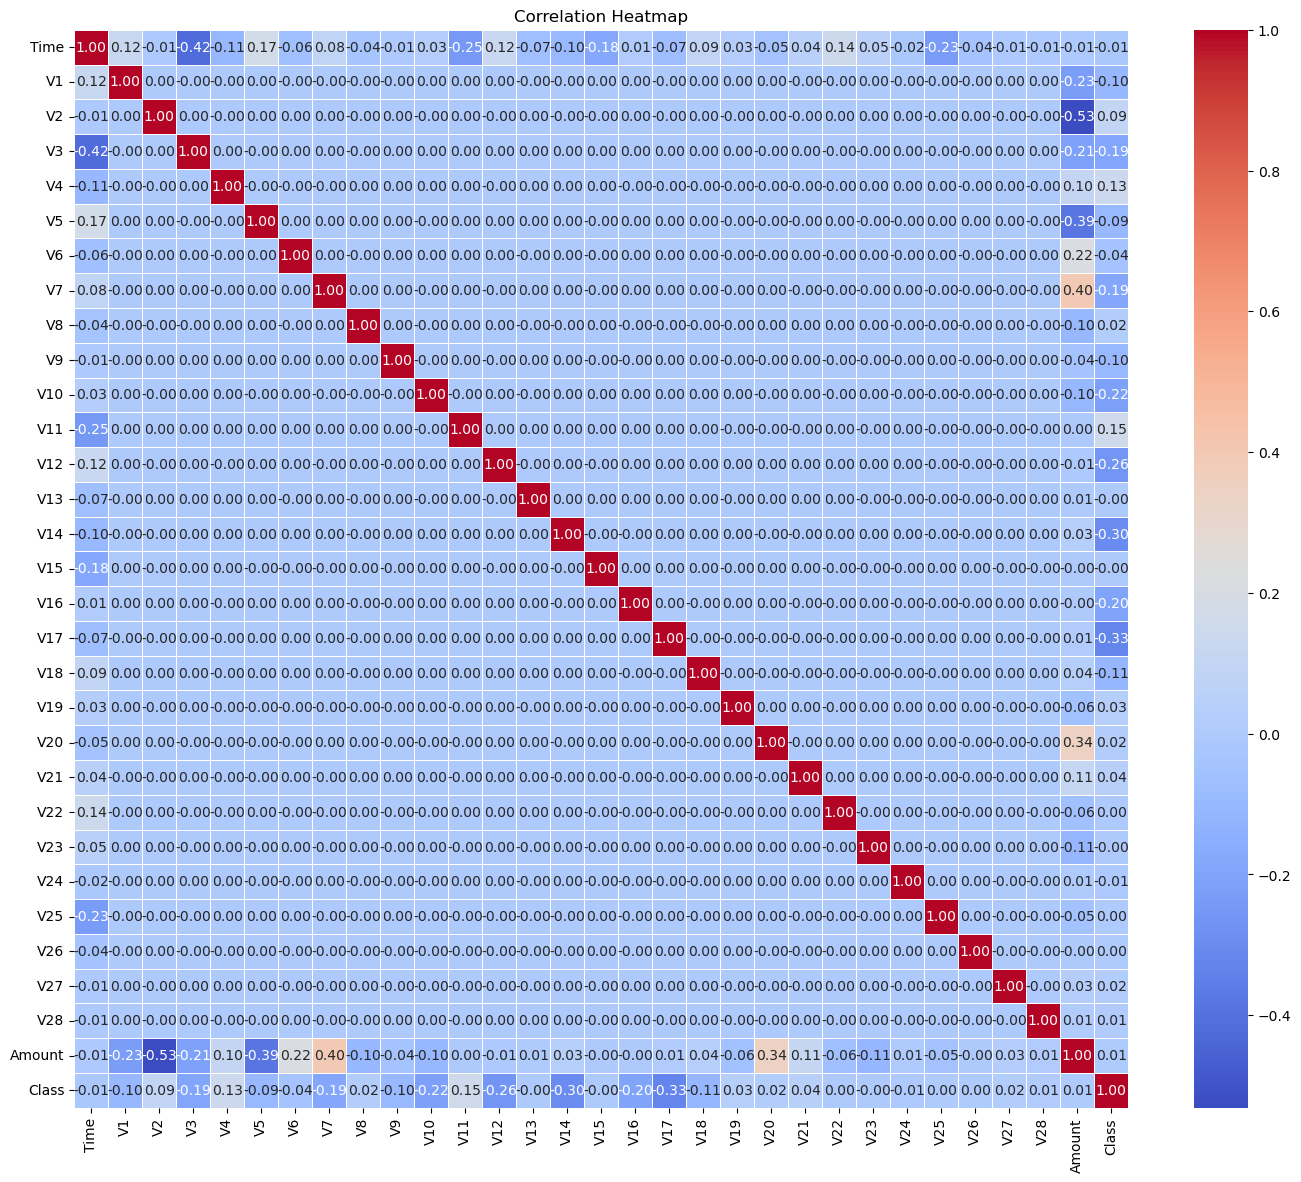

In [80]:
#Heatmap to visualize the correlation between numerical features.

plt.figure(figsize=(17, 14))
sns.heatmap(credit_card_df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Pairplot for a Subset of Features


#### Pairplot for a subset of features, considering the high dimensionality.

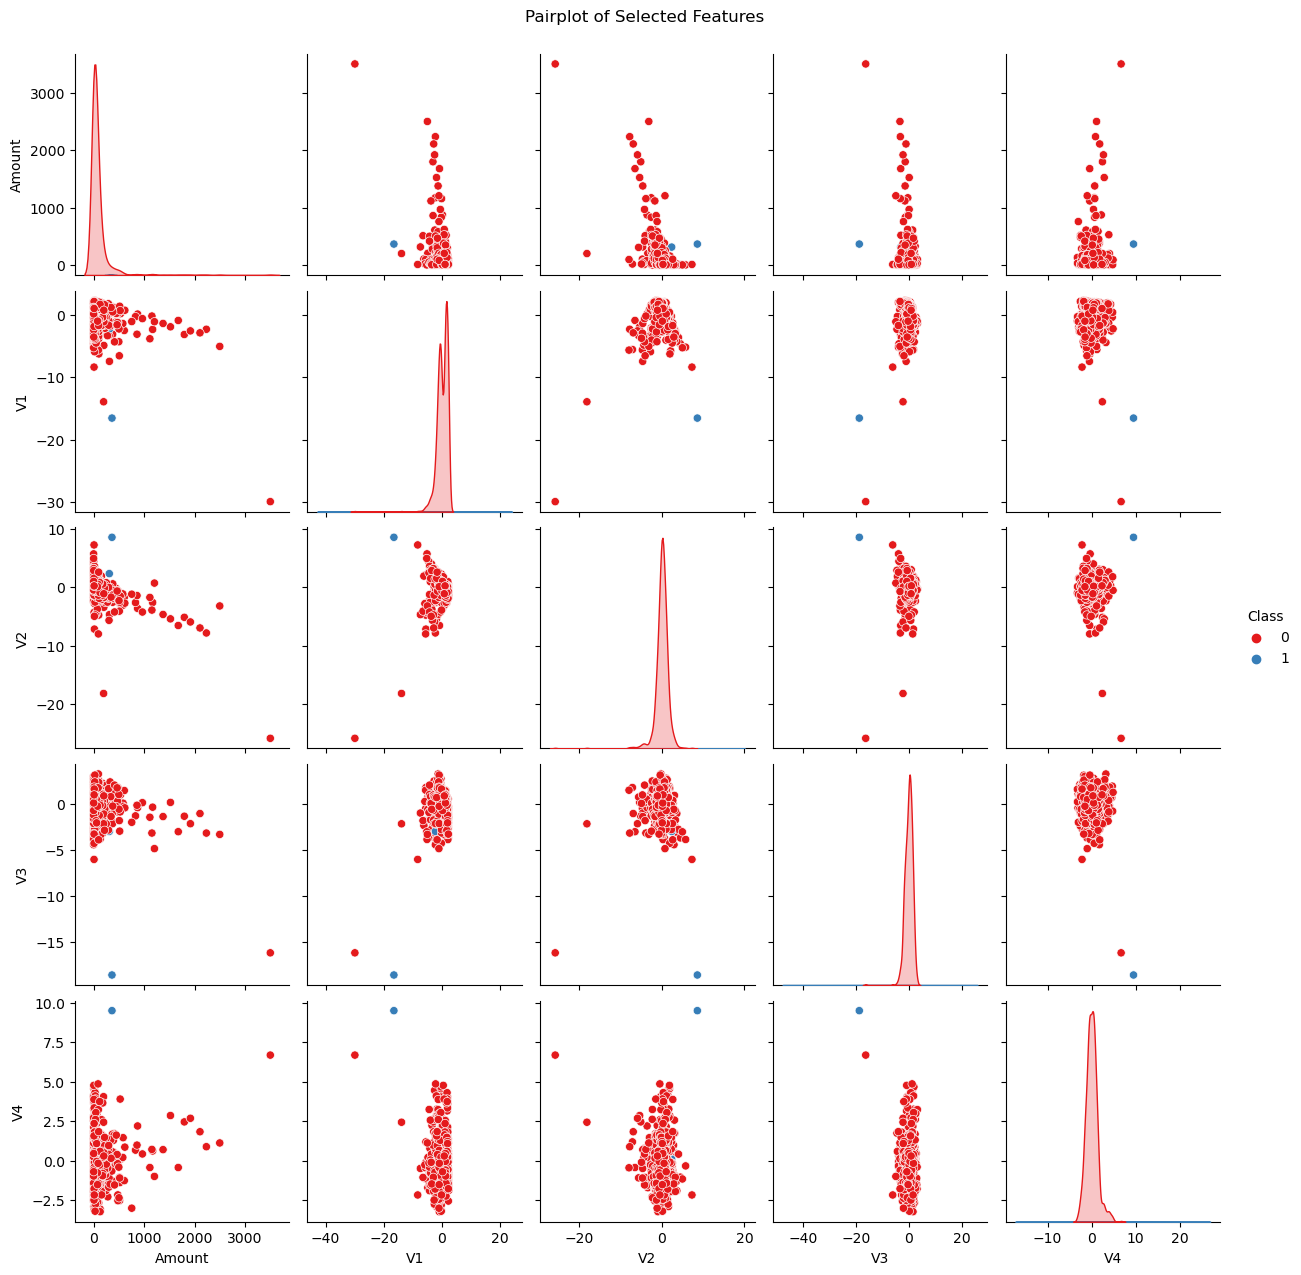

In [81]:
selected_features = ['Amount', 'V1', 'V2', 'V3', 'V4', 'Class']
# Sample a random subset of 1000 data points to reduce plotting time
subset_data = credit_card_df[selected_features].sample(n=1000, random_state=42)
# Pairplot for the selected features
sns.pairplot(subset_data, hue='Class', palette='Set1')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


## Time vs. Amount for Fraud and Valid Transactions

#### Scatter plot to visualize the relationship between time and transaction amount for both classes.4

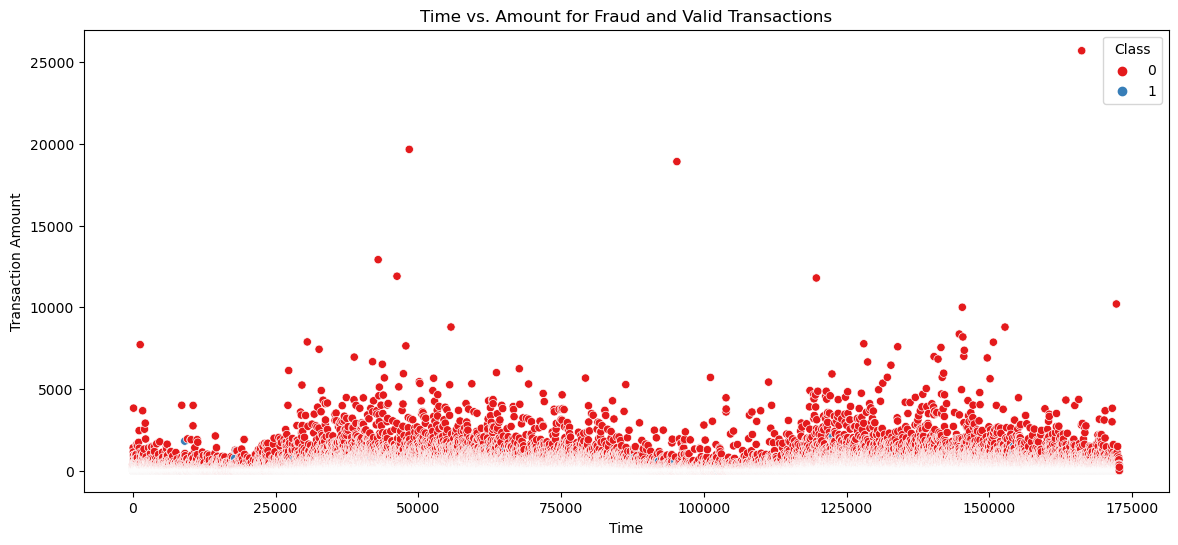

In [82]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=credit_card_df, palette='Set1')
plt.title('Time vs. Amount for Fraud and Valid Transactions')
plt.xlabel('Time')
plt.ylabel('Transaction Amount')
plt.show()

The scatter plot helps visualize the relationship between time and transaction amount for both fraud and valid transactions. Patterns in this plot could indicate time-dependent behavior in transactions.

## Distribution of Transaction Times for Fraud and Valid Transactions

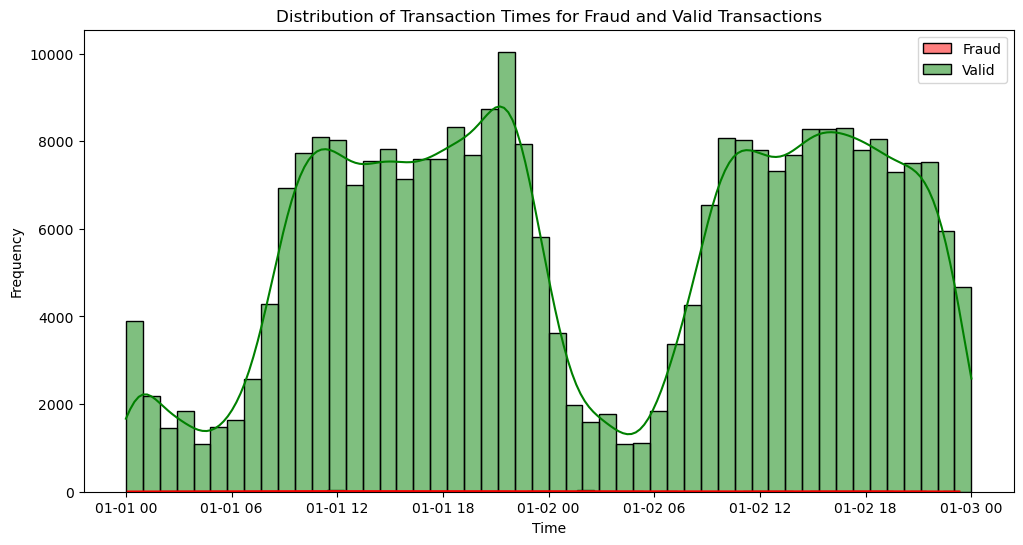

In [83]:
# Convert the 'Time' column to datetime for easier analysis
credit_card_df['Time'] = pd.to_datetime(credit_card_df['Time'], unit='s')

# Sort the DataFrame by time for sequential analysis
credit_card_df.sort_values(by='Time')

# Separate fraud and valid transactions
fraud_df = credit_card_df[credit_card_df['Class'] == 1]
valid_df = credit_card_df[credit_card_df['Class'] == 0]

# Plot the distribution of transaction times for fraud and valid transactions
plt.figure(figsize=(12, 6))
sns.histplot(fraud_df['Time'], bins=50, kde=True, color='red', label='Fraud')
sns.histplot(valid_df['Time'], bins=50, kde=True, color='green', label='Valid')
plt.title('Distribution of Transaction Times for Fraud and Valid Transactions')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Transaction Time Distribution by Class

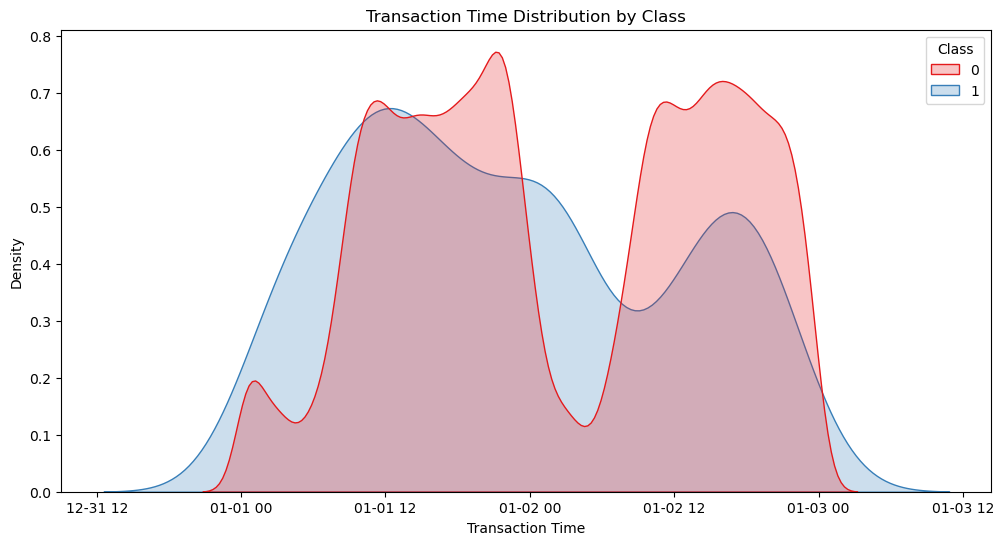

In [37]:
# Convert the 'Time' column to datetime for analysis

credit_card_df['Time'] = pd.to_datetime(credit_card_df['Time'], unit='s')

plt.figure(figsize=(12, 6))
sns.kdeplot(data=credit_card_df, x='Time', fill=True, hue='Class', palette='Set1', common_norm=False)
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Transaction Time')
plt.ylabel('Density')
plt.show()


This plot illustrates the distribution of transaction times for fraud and valid transactions. You can observe whether there are specific time intervals where fraudulent activity is more prevalent.